## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [145]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
plt.rc('figure', figsize=(7,4))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [122]:
data = pd.read_csv('denc_Neutrino (2)')
data['in_halo'] = (data['halo_mass']>1200).astype('int32')
data

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,10156552,755,2280.0,171.21194,220.56293,-274.228700,-0.084922,-0.052028,-0.042415,-0.028087,-0.024984,-0.018675,-0.016231,-0.011940,-0.010111,1
1,11068486,85,1539.0,-129.84116,92.60424,212.125500,-0.127820,-0.081099,-0.051217,-0.028345,-0.013751,-0.013991,-0.012344,-0.011500,-0.012220,1
2,9530036,654,1944.0,-290.99210,-885.49430,468.255040,-0.078978,-0.052806,-0.030027,-0.011704,0.001295,0.003803,0.005131,0.005231,0.003787,1
3,11455022,752,1394.0,-60.35258,422.43716,79.394300,-0.109989,-0.079155,-0.054663,-0.037685,-0.026670,-0.017901,-0.009227,-0.000868,0.001568,1
4,8591034,356,1649.0,403.66608,345.88077,9.231552,-0.084405,-0.019068,-0.009396,-0.001539,0.002288,0.005629,0.011288,0.013111,0.013433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2160800,451,2634.0,654.82430,210.78130,255.344150,-0.094225,-0.076043,-0.060624,-0.040368,-0.020840,-0.016261,-0.011803,-0.005002,0.000918,1
99996,3257728,43,1112.0,-154.27774,488.65564,-779.558400,-0.127045,-0.076529,-0.056246,-0.038201,-0.027520,-0.016374,-0.008045,0.002627,0.006124,0
99997,6101605,484,1198.0,-113.51735,68.44336,275.964000,-0.122135,-0.091794,-0.063465,-0.032060,-0.017973,-0.016684,-0.017740,-0.017154,-0.012600,0
99998,4576456,44,1058.0,-130.21120,292.63483,-754.563000,-0.097585,-0.076140,-0.061788,-0.054584,-0.043055,-0.032415,-0.021591,-0.007463,0.004673,0


In [123]:
data.describe()

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.716004e+06,424.627710,2369.299450,35.207601,-13.728656,97.821939,-0.107338,-0.062074,-0.038666,-0.025951,-0.017900,-0.011968,-0.007224,-0.003341,-0.000224,0.740470
std,3.549230e+06,230.962533,1856.527585,364.820655,369.919751,373.578625,0.020301,0.020965,0.019921,0.018106,0.015956,0.013969,0.012346,0.011069,0.010084,0.438379
min,2.131444e+06,16.000000,241.000000,-1247.932500,-1462.806300,-1250.519700,-0.127820,-0.099572,-0.083351,-0.072824,-0.065316,-0.058751,-0.050519,-0.043771,-0.038371,0.000000
25%,5.953820e+06,238.000000,1194.000000,-226.284345,-254.656135,-145.829085,-0.124202,-0.077891,-0.052474,-0.038510,-0.028860,-0.021233,-0.015384,-0.010712,-0.006964,0.000000
50%,9.043250e+06,418.000000,1791.000000,32.857450,-4.815737,101.883412,-0.113607,-0.063404,-0.039434,-0.026100,-0.017784,-0.011980,-0.007369,-0.003743,-0.000713,1.000000
75%,1.176120e+07,619.000000,2945.000000,284.168098,238.543253,350.062135,-0.095776,-0.048722,-0.025370,-0.013587,-0.006677,-0.002087,0.001081,0.004249,0.006694,1.000000
max,1.464652e+07,870.000000,10101.000000,1314.092800,1256.822900,1355.984900,0.017155,0.032463,0.044346,0.040490,0.042179,0.036009,0.033482,0.034145,0.032602,1.000000


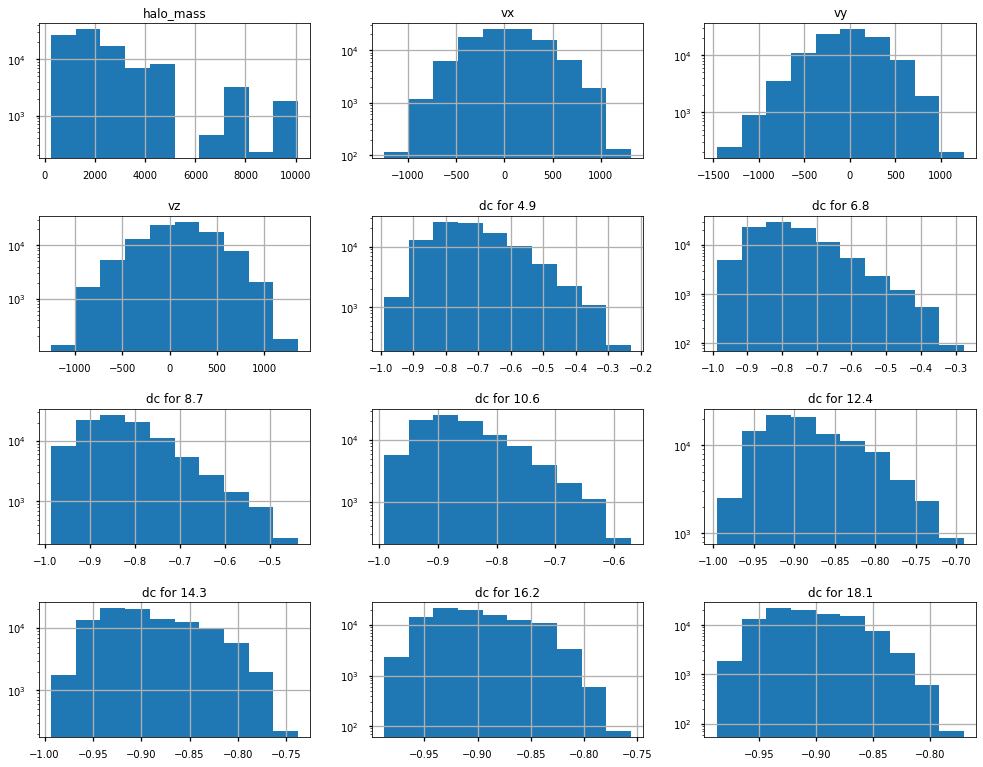

In [6]:
data.iloc[:,2:14].hist(figsize=(14,11), log=True)
plt.tight_layout()
plt.show()

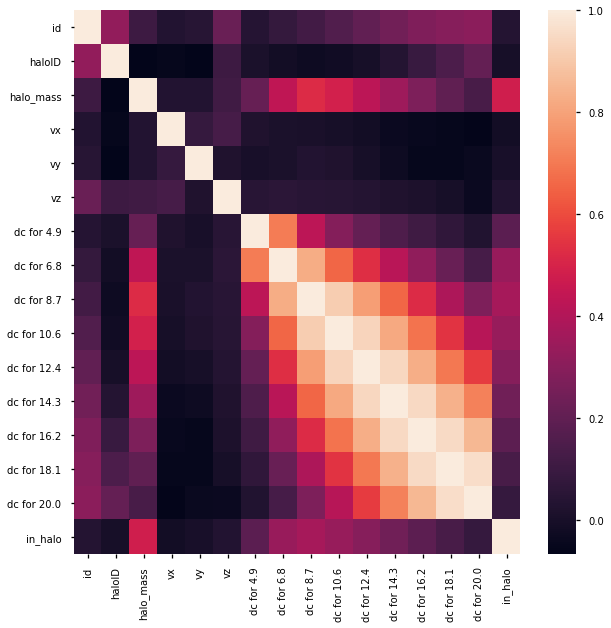

In [124]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('snscorr.png')

## Define Datasets

In [125]:
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [126]:
X = (X - np.mean(X))/np.std(X)

In [127]:
tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


# Keras

In [140]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.losses import MeanSquaredError
from sklearn.metrics import classification_report


model = keras.Sequential()
# model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
model.add(keras.layers.Dense(units=36, 
                           activation='relu', 
                           kernel_regularizer=keras.regularizers.l2(.05)))
# model.add(layers.Dense(30,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='relu'))
model.add(keras.layers.Dense(1, activation='softmax'))


model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['Accuracy'])

In [141]:
hist = model.fit(
    X_train,
    Y_train,
    batch_size= 100,
    epochs=40,
    verbose=2,
    validation_split=.2,
    shuffle=True,
)

Epoch 1/40
640/640 - 1s - loss: 0.5828 - Accuracy: 0.7414 - val_loss: 0.5720 - val_Accuracy: 0.7415
Epoch 2/40
640/640 - 1s - loss: 0.5717 - Accuracy: 0.7414 - val_loss: 0.5721 - val_Accuracy: 0.7415
Epoch 3/40
640/640 - 1s - loss: 0.5720 - Accuracy: 0.7414 - val_loss: 0.5715 - val_Accuracy: 0.7415
Epoch 4/40
640/640 - 1s - loss: 0.5718 - Accuracy: 0.7414 - val_loss: 0.5715 - val_Accuracy: 0.7415
Epoch 5/40
640/640 - 1s - loss: 0.5718 - Accuracy: 0.7414 - val_loss: 0.5715 - val_Accuracy: 0.7415
Epoch 6/40
640/640 - 1s - loss: 0.5718 - Accuracy: 0.7414 - val_loss: 0.5718 - val_Accuracy: 0.7415
Epoch 7/40
640/640 - 1s - loss: 0.5718 - Accuracy: 0.7414 - val_loss: 0.5720 - val_Accuracy: 0.7415
Epoch 8/40
640/640 - 1s - loss: 0.5718 - Accuracy: 0.7414 - val_loss: 0.5716 - val_Accuracy: 0.7415
Epoch 9/40
640/640 - 1s - loss: 0.5718 - Accuracy: 0.7414 - val_loss: 0.5716 - val_Accuracy: 0.7415
Epoch 10/40
640/640 - 1s - loss: 0.5719 - Accuracy: 0.7414 - val_loss: 0.5716 - val_Accuracy: 0.7415

## Tuning HP

In [105]:
# !pip install -q -U keras-tuner
import keras_tuner as kt

In [130]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
#   model.add(keras.layers.Dense(units=hp_units, 
#                                activation='relu', 
#                                kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(1, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [135]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt4')

In [136]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [137]:
tuner.search(X_train, Y_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 09s]
val_accuracy: 0.7415000200271606

Best val_accuracy So Far: 0.7415000200271606
Total elapsed time: 00h 02m 06s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 36 and the optimal learning rate for the optimizer
is 0.02.



## Classification Report

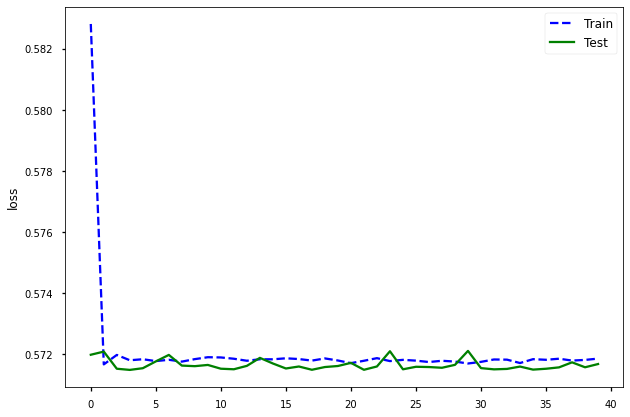

In [142]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist.history['loss'], '--b')
ax1.plot(hist.history['val_loss'] , 'g')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [143]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, model.predict(X_test)>.5)
print(clf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5267
           1       0.74      1.00      0.85     14733

    accuracy                           0.74     20000
   macro avg       0.37      0.50      0.42     20000
weighted avg       0.54      0.74      0.62     20000



C:\Users\ff15m\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ff15m\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ff15m\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


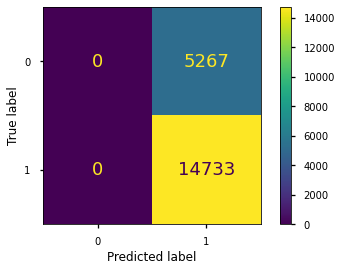

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test)>.5)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp1.plot()
plt.show()